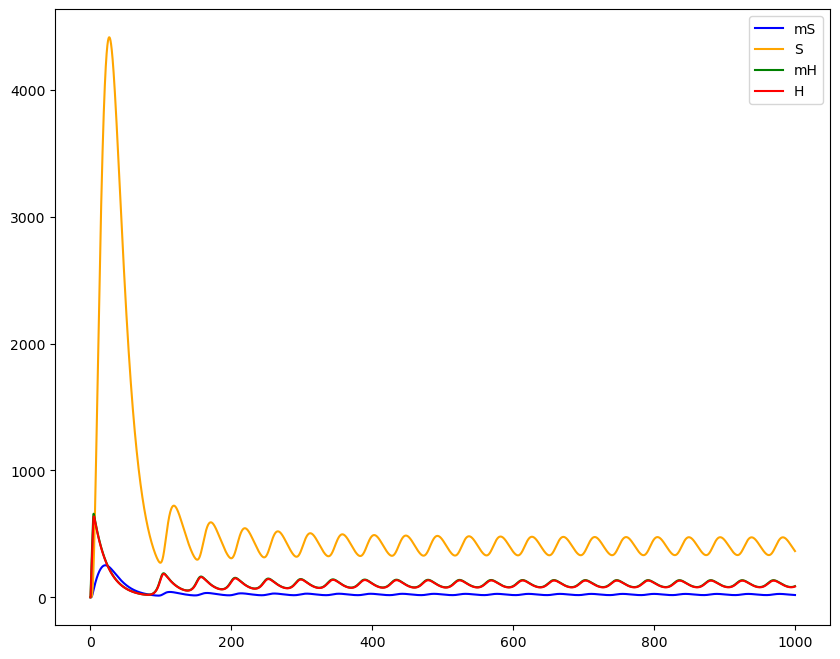

: 

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# 定义微分方程系统
def system(t, vars, params):
    mS, mH, S, H = vars
    alpha_s0, alpha_S, K_Hn1, n1, delta_m, alpha_H0, alpha_H, K_Sn2, n2, delta_S, delta_H, beta = params
    
    dmSdt = alpha_s0 + alpha_S * (H**n1)/(K_Hn1**n1 + H**n1) - delta_m * mS
    dmHdt = alpha_H0 + alpha_H * (K_Sn2**n2)/(K_Sn2**n2 + S**n2) - delta_m * mH
    dSdt = beta * mS - delta_S * S
    dHdt = beta * mH - delta_H * H
    
    return [dmSdt, dmHdt, dSdt, dHdt]

# 参数设置（假设值）
params = [
    0.1,         # alpha_s0
    30.5,         # alpha_S
    326,         # K_Hn1
    3,           # n1
    0.05,        # delta_m
    0.1,         # alpha_H0
    183,         # alpha_H
    185,         # K_Sn2
    4.8,           # n2
    0.2,         # delta_S
    3.8,         # delta_H
    3.7         # beta
]

# 初始条件
initial_conditions = [0, 0, 0, 0]  # mS, mH, S, H

# 时间范围
t_span = (0, 1000)
t_eval = np.linspace(t_span[0], t_span[1], 100000)

# 求解微分方程
solution = solve_ivp(system, t_span, initial_conditions, args=(params,), t_eval=t_eval, method='LSODA')

# 绘制结果
plt.figure(figsize=(10, 8))
plt.plot(solution.t, solution.y[0], label='mS', color='blue')
plt.plot(solution.t, solution.y[2], label='S', color='orange')
plt.plot(solution.t, solution.y[1], label='mH', color='green')
plt.plot(solution.t, solution.y[3], label='H', color='red')
""" plt.subplot(2, 2, 1)
plt.plot(solution.t, solution.y[0])
plt.title('mS over time')
plt.xlabel('Time')
plt.ylabel('mS')

plt.subplot(2, 2, 2)
plt.plot(solution.t, solution.y[1])
plt.title('mH over time')
plt.xlabel('Time')
plt.ylabel('mH')

plt.subplot(2, 2, 3)
plt.plot(solution.t, solution.y[2])
plt.title('S over time')
plt.xlabel('Time')
plt.ylabel('S')

plt.subplot(2, 2, 4)
plt.plot(solution.t, solution.y[3])
plt.title('H over time')
plt.xlabel('Time')
plt.ylabel('H')

plt.tight_layout() """
plt.legend()
plt.show()